# Demo of kNN

First we load some favourites

In [0]:
import numpy as np # vectors etc
import matplotlib.pyplot as plt # for plotting

Downloading or generating data to play with is easy using sklearn.

In [0]:
# load the data generators and make some 2d classification data
from sklearn.datasets import make_classification, make_moons

X, y = make_moons(n_samples=100, noise=.1)
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=4, n_clusters_per_class=1)

It looks like this

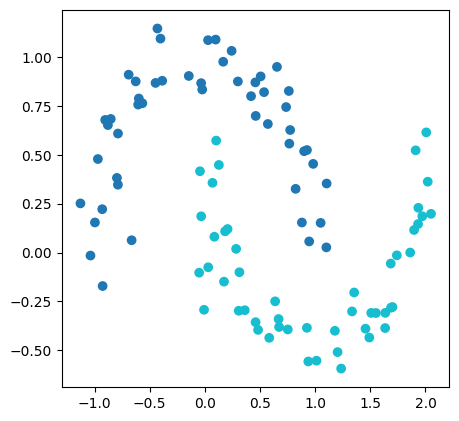

In [30]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.show()

Making a classifier with sklearn (almost) always entails:

1.   Import classifier
2.   Instantiate with defaoult or chosen hyperparameters
3.   Run the fit() method with the training data

Note that there is no training/test split here for now.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

This generates a grid of test points. If we feed these to the classfier, we can visualise the different decision regions.

In [0]:
h = .1
x_min, x_max = X[:, 0].min() - h, X[:, 0].max() + h
y_min, y_max = X[:, 1].min() - h, X[:, 1].max() + h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Now for plotting it.

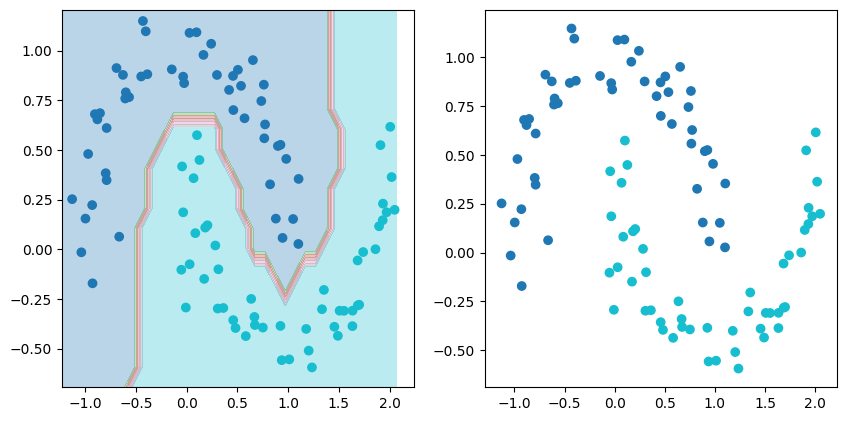

In [33]:
plt.figure(figsize=(10, 5), dpi=100)
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=.3, cmap='tab10')#, levels=[0])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
plt.show()

Running the score() method compares classifiers performancce on data set X with target labels y. Since there was no train/test split here, the output is the accuracy on the training set.

In [34]:
print("Training set accuract %.1f%%" % (classifier.score(X, y)*100))

Training set accuract 100.0%
